Link Dashboard:
https://public.tableau.com/app/profile/muhammad.nuzul.mahfiruddin/viz/Book2_17273601233140/Dashboard1?publish=yes

## **A. Pendahuluan**

**Demographic Analysis**
Analisis demografi dapat digunakan dalam e-commerce untuk memahami karakteristik pelanggan, seperti usia, jenis kelamin, lokasi, dan perilaku pembelian. Informasi ini nantinya dapat memudahkan dalam pengambilan keputusan seputar bisnis yang berbasiskan pada data. Lalu, dengan informasi ini, perusahaan dapat mempersonalisasi produk berdasarkan pelanggan yang dapat meningkatkan loyalitas.

**Tableau**
Dashboard dari Tableau dapat membantu menjalankan analisis ini dengan bagan dan grafik interaktif. User dapat mengambil dan menggunakan informasi analisis demografi dengan mudah. Selain itu, dashboard ini dapat diperbaharui secara real-time sehingga dapat digunakan secara berkelanjutan.

Maka dari itu, project ini bertujuan untuk melakukan analisis demografi menggunakan library pandas dan dashboard Tableu. Project ini menggunakan data e-commerce dengan sumber di bawah.

Data: https://www.kaggle.com/datasets/bhavikjikadara/retail-transactional-dataset

## **B. Data Loading**

In [ ]:
# Set up module
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

In [ ]:
# Membaca data csv dan mengubahnya sebagai dataframe
df_1 = pd.read_csv(r'C:\Users\mnuzu\Downloads\Produktif_Produktif_Produktif\data_analysis_project_02\data\retail_data.csv', delimiter=',')

## **C. Data Cleaning**

### **1. Mengecek data secara general**

In [36]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302006 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301673 non-null  float64
 1   Customer_ID       301698 non-null  float64
 2   Name              301624 non-null  object 
 3   Email             301659 non-null  object 
 4   Phone             301644 non-null  float64
 5   Address           301691 non-null  object 
 6   City              301758 non-null  object 
 7   State             301725 non-null  object 
 8   Zipcode           301666 non-null  float64
 9   Country           301735 non-null  object 
 10  Age               301833 non-null  float64
 11  Gender            301689 non-null  object 
 12  Income            301716 non-null  object 
 13  Customer_Segment  301791 non-null  object 
 14  Date              301647 non-null  object 
 15  Year              301656 non-null  float64
 16  Month             301733 

Data yang digunakan pada Notebook ini adalah Data Retail Transactional Dataset.
* Data ini bersifat sintetis atau bukan merupakan hasil dari pengukuran langsung dari kenyataan, namun hasil dari buatan manusia. Tapi data ini menyimpan informasi yang dapat merepresentasikan kenyataan.
* Data berformat csv dan memiliki 30 kolom seperti di bawah ini:
    * Kolom tentang Customer Information:
        * Customer ID: A unique identifier for each customer.
        * Name: Customer’s full name.
        * Email: Customer’s email address for communication.
        * Phone: Contact number of the customer.
        * Address: Physical address of the customer.
        * City, State, Zipcode, Country: Geographic details of the customer.
        * Age: Age of the customer.
        * Gender: Gender of the customer.
        * Income: Income bracket or level of the customer.
        * Customer Segment: Classification of customers based on behavior or demographics.
    * Kolom tentang Transaction Details:
        * Last Purchase Date: Date of the customer’s most recent purchase.
        * Total Purchases: Total number of purchases made by the customer.
        * Amount Spent: Total monetary amount spent by the customer.
    * Kolom tentang Product Information:
        * Product Category: Category to which the purchased product belongs (e.g., electronics, clothing, groceries).
        * Product Brand: Brand name of the product.
        * Product Type: Type or model of the product purchased.
    * Kolom tentang Feedback:
        * Feedback: Customer’s feedback or rating related to the product or service received.
    * Kolom tentang Transaction Logistics:
        * Shipping Method: The method used to deliver the purchased products.
        * Payment Method: The method of payment chosen by the customer.
        * Order Status: Status of the order (e.g., shipped, delivered, canceled).

Penjelasan Atribut:
* Atribut Total_Amount merupakan jumlah duit yang dibayar oleh pembeli dalam satu transaksi yang menggambarkan nilai penjualan per pembeli.

### **2. Mengecek baris yang duplikat**

Data yang diambil dari sumber manapun bisa saja memiliki baris data yang duplikat. Hal ini terjadi karena adanya kesalahan pada input data. Kondisi ini mengekibatkan data tersebut tidak bisa dipakai untuk analisis statistik. Maka dari itu, kondisi ini perlu dicek.

In [5]:
# Memperlihatkan jumlah keseluruhan baris data
print('Jumlah baris untuk keseluruhan data adalah', df_1.shape[0])
# Memperlihatkan jumlah baris data yang dihapus duplikatnya
print('Jumlah baris ketika baris duplikat dihilangkan adalah', df_1.drop_duplicates().shape[0])

Jumlah baris untuk keseluruhan data adalah 302010
Jumlah baris ketika baris duplikat dihilangkan adalah 302006


Dari informasi di atas, jumlah baris sebelum dan sesudah baris duplikat dihapus adalah berbeda. Maka dari itu, baris data yang duplikat pada data perlu dihapus agar melancarkan proses analisis statistik nantinya.

In [6]:
# Menghapus baris data yang duplikat
df_2 = df_1.drop_duplicates()

### **3. Mengecek missing values**

Data yang diambil dari sumber manapun bisa saja memiliki missing value. Kondisi ini mengekibatkan data tersebut tidak bisa dipakai untuk analisis statistik. Maka dari itu, kondisi ini perlu dicek.

In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302006 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301673 non-null  float64
 1   Customer_ID       301698 non-null  float64
 2   Name              301624 non-null  object 
 3   Email             301659 non-null  object 
 4   Phone             301644 non-null  float64
 5   Address           301691 non-null  object 
 6   City              301758 non-null  object 
 7   State             301725 non-null  object 
 8   Zipcode           301666 non-null  float64
 9   Country           301735 non-null  object 
 10  Age               301833 non-null  float64
 11  Gender            301689 non-null  object 
 12  Income            301716 non-null  object 
 13  Customer_Segment  301791 non-null  object 
 14  Date              301647 non-null  object 
 15  Year              301656 non-null  float64
 16  Month             301733 

In [8]:
keseluruhan_baris_data = df_2.shape[0]
baris_data_dengan_missing_value = df_2.isnull().any(axis=1).sum()
persentasi_missing_value = round((baris_data_dengan_missing_value/keseluruhan_baris_data*100), 2)

print('Jumlah keseluruhan baris data adalah:', keseluruhan_baris_data)
print('Jumlah baris data yang memiliki missing value adalah:', baris_data_dengan_missing_value, 'yang merupakan', persentasi_missing_value, '% dari keseluruhan baris data.')

Jumlah keseluruhan baris data adalah: 302006
Jumlah baris data yang memiliki missing value adalah: 8098 yang merupakan 2.68 % dari keseluruhan baris data.


Berdasarkan informasi di atas, ada banyak atribut yang memiliki missing value. Baris dengan missing value berjumlah 8098 baris atau hanya berkisar 2.68 % dari keseluruhan baris. Agar tidak mengganggu proses analisis statistik, baris dengan missing value ini perlu dihilangkan. Penghilangan baris ini tidak memberikan efek yang signifikan karena memiliki jumlah yang sedikit.

In [9]:
# Menghilangkan baris data yang memiliki missing value
df_3 = df_2.dropna()

### **4. Mengecek konsistensi tipe data tiap kolom**

Kondisi data 0NF tidak bisa dipakai untuk melakukan analisis statistik. Hal ini terjadi karena adanya atribut data yang tidak konsisten. Kondisi data 0NF bisa terjadi karena adanya kesalahan pada proses input data. Bisa saja satu cell pada atribut Amount berisi tipe data teks atau list yang tidak sesuai dengan maksud dari data tersebut. Maka dari itu, kondisi ini perlu dicek.

**Mengecek apakah atribut data memiliki data dengan tipe yang tidak sesuai dengan maksudnya**

In [10]:
# Memperlihatkan info general dari data
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293908 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    293908 non-null  float64
 1   Customer_ID       293908 non-null  float64
 2   Name              293908 non-null  object 
 3   Email             293908 non-null  object 
 4   Phone             293908 non-null  float64
 5   Address           293908 non-null  object 
 6   City              293908 non-null  object 
 7   State             293908 non-null  object 
 8   Zipcode           293908 non-null  float64
 9   Country           293908 non-null  object 
 10  Age               293908 non-null  float64
 11  Gender            293908 non-null  object 
 12  Income            293908 non-null  object 
 13  Customer_Segment  293908 non-null  object 
 14  Date              293908 non-null  object 
 15  Year              293908 non-null  float64
 16  Month             293908 

Dari informasi di atas, semua atribut data memiliki tipe data yang sesuai dengan maksud datanya. Contoh, atribut data `Amount` bertipe `float64` dan kolom `Country` bertipe `object`.

**Mengecek apakah tiap cell berisi tipe data list atau dict**

In [11]:
# Membuat list kosong yang akan diisi dengan baris yang memiliki tipe data bukan string dan angka
data = {
    'nama_kolom': [],
    'indeks': [],
    'nilai_cell' : []
}
df_temp = pd.DataFrame(data)

non_string_row_index = []

# Melakukan looping nama-nama kolom pada data tokopedia
for column_name in df_3:
    # Melakukan looping baris-baris pada data tokopedia
    for row_index in range(df_3.shape[0]):
        # Conditional untuk mencari baris yang memiliki tipe data bukan string dan angka
        cell = df_3[column_name].iloc[row_index]
        if type(cell) != np.float64 and type(cell) != str:
            # Mengisi baris yang memiliki tipe data bukan string dan angka ke dalam dataframe
            new_row = pd.DataFrame({'nama_kolom': [column_name], 'indeks': [row_index], 'nilai_cell': df_3[column_name].iloc[row_index]})
            df_temp = pd.concat([df_temp, new_row], ignore_index=True)
# Memperlihatkan datframe dengan baris yang memiliki tipe data bukan string dan angka
df_temp

,nama_kolom,indeks,nilai_cell


Dari informasi di atas, tidak ada kolom yang memiliki data dengan tipe selain `string`, `float`, `integer`, sehingga tiap kolom memiliki data yang konsisten.

### **5. Mengecek apakah atribut Customer ID berisikan baris yang konsisten**

Atribut Customer ID digunakan untuk sebagai ID atau membedakan satu pembeli dengan pembeli yang lain. Dua pembeli yang berbeda tidak mungkin memiliki Customer ID yang sama. Nilai Customer ID ini diberikan kepada pembeli secara otomatis, sehingga bisa saja terjadi error pada proses ini. Hal ini mengakibatkan beberapa pembeli yang berbeda memiliki Customer ID yang sama, sehingga beberapa orang yang berbeda dapat dianggap menjadi satu dan mempengaruhi analisis statistik nantinya. Maka dari itu, kondisi ini perlu dicek.

In [12]:
# Memperlihatkan beberapa baris data
df_3[df_3['Customer_ID'].duplicated(keep=False)].sort_values(by='Customer_ID').head(7)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
231852,8180050.0,10000.0,John Patterson,Victoria5@gmail.com,6.855935e+09,136 Perkins Street,Phoenix,North Carolina,28468.0,USA,...,429.917804,Grocery,Coca-Cola,Water,Excellent,Same-Day,PayPal,Delivered,5.0,Sparkling water
290160,4759669.0,10000.0,Robert Cook,Caroline60@gmail.com,8.428883e+09,232 Lawrence Greens,San Antonio,Nevada,89220.0,USA,...,2683.057011,Electronics,Samsung,Tablet,Average,Express,Debit Card,Pending,2.0,Amazon Fire Tablet
297459,8901617.0,10000.0,Teresa Cole,Molly61@gmail.com,3.057277e+09,14721 Robert Glen Apt. 663,Hamburg,Berlin,56734.0,Germany,...,395.898272,Home Decor,Bed Bath & Beyond,Bedding,Good,Express,Credit Card,Delivered,4.0,Quilt
145221,4340470.0,10000.0,Thomas Thompson,Christy6@gmail.com,6.640433e+09,719 Kevin Route,San Francisco,Maine,87288.0,USA,...,1498.693271,Clothing,Nike,Shorts,Good,Same-Day,Cash,Delivered,3.0,Khaki shorts
102493,3875669.0,10001.0,Rebecca Lee,Michael61@gmail.com,5.831371e+09,479 Marc Pass Apt. 496,Brighton,England,67759.0,UK,...,969.330298,Books,Penguin Books,Fiction,Excellent,Same-Day,PayPal,Shipped,5.0,Adventure
112445,5025854.0,10001.0,Mark Barber,Mckenzie38@gmail.com,4.507314e+09,206 Janice Landing,Hanover,Berlin,64961.0,Germany,...,3879.544482,Clothing,Zara,Shirt,Excellent,Same-Day,Cash,Processing,5.0,Tank top
236406,2202795.0,10001.0,Cynthia Simmons,Daniel17@gmail.com,5.948862e+09,50931 Wilson Lodge,Melbourne,New South Wales,21143.0,Australia,...,1711.801266,Grocery,Coca-Cola,Juice,Excellent,Express,Debit Card,Shipped,4.0,Pomegranate juice


Dari informasi di atas,
Terdapat beberapa baris data yang memiliki Customer_ID 10000.0. Hal ini tidak menunjukkan bahwa satu pembeli melakukan transaksi berulang kali karena memiliki nama dan gender yang berbeda-beda. Lalu, pembeli juga tidak mungkin dapat mengganti nama dan gendernya. Maka dari itu, untuk membuat atribut data tentang berapa kali pembeli yang sama melakukan transaksi, data ini perlu ditambah atribut Customer_ID yang baru. Pembuatan atribut ini berdasarkan nilai unik dari atribut nama dan gender.

In [13]:
# Membuat dataframe baru
df_4 = df_3.copy()

# Membuat atribut baru berisikan kombinasi atribut Name dan Gender
df_4['Kombinasi_Name_Gender'] = df_4[['Name', 'Gender']].agg('-'.join, axis=1)

# Membuat atribut Customer_ID_Baru berdasarkan atribut Kombinasi_Name_Gender
df_4['Customer_ID_Baru'] = pd.factorize(df_4['Kombinasi_Name_Gender'])[0] + 10000

# Menghapus atribut Customer_ID dan Kombinasi_Name_Gender
df_4 = df_4.drop(['Customer_ID', 'Kombinasi_Name_Gender'], axis=1)

# Memperlihatkan data
df_4.head()

,Transaction_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,...,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Customer_ID_Baru
0,8691788.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,...,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts,10000
1,2174773.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,...,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab,10001
2,6679610.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,...,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment,10002
3,7232460.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,...,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife,10003
4,4983775.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,...,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies,10004


### **6. Mengecek apakah ada data Transaction ID memiliki duplikat**

Hampir mirip dengan Customer ID, atribut Transaction ID digunakan untuk sebagai ID atau membedakan satu transaksi dengan yang lain. Beberapa baris data tidak mungkin memiliki Transaction ID yang sama. Namun, error bisa saja terjadi yang mengakibatkan beberapa transaksi memiliki Transaction_ID yang sama, yang mengakibatkan sulitnya membedakan satu transaksi dengan yang lain. Maka dari itu, kondisi ini perlu dicek.

In [14]:
# Memperlihatkan beberapa baris data
df_4[df_4['Transaction_ID'].duplicated(keep=False)].sort_values(by='Transaction_ID').head(5)

,Transaction_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,...,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Customer_ID_Baru
91025,1003092.0,Nicholas Moore,Danielle79@gmail.com,6.988331e+09,5564 Daniel Garden Apt. 073,Chicago,Connecticut,6790.0,USA,34.0,...,Grocery,Pepsi,Water,Good,Standard,PayPal,Delivered,4.0,Bottled water,82351
256845,1003092.0,Yolanda Blankenship,Kristine9@gmail.com,2.360380e+09,0933 Yolanda Island,St. John's,Ontario,9692.0,Canada,23.0,...,Home Decor,Bed Bath & Beyond,Bathroom,Good,Standard,Cash,Pending,4.0,Shower,178069
165944,1005039.0,John Tate,Andrea27@gmail.com,9.064051e+09,7563 Pittman Tunnel,Bonn,Berlin,35327.0,Germany,23.0,...,Grocery,Coca-Cola,Water,Bad,Same-Day,Debit Card,Pending,1.0,Flavored water,87217
301783,1005039.0,John Tate,Andrea27@gmail.com,9.064051e+09,7563 Pittman Tunnel,Bonn,Berlin,35327.0,Germany,68.0,...,Grocery,Coca-Cola,Water,Bad,Same-Day,Cash,Pending,1.0,Sparkling water,87217
248390,1005669.0,James Clark,William33@gmail.com,5.697402e+09,190 Murray Trail Apt. 129,Dresden,Berlin,54281.0,Germany,22.0,...,Grocery,Pepsi,Soft Drink,Good,Express,Credit Card,Pending,3.0,Fruit punch,79035


Dari informasi di atas, terdapat beberapa baris data yang memiliki Transaction_ID 1003092.0.
Hal ini tidak mungkin terjadi seperti yang dijelaskan sebelumnya. Maka dari itu, untuk membedakan tiap transaksi, data ini perlu membuat atribut Transaction_ID baru.

In [15]:
# Membuat dataframe baru
df_5 = df_4.copy()

# Membuat atribut Customer_ID_Baru
df_5['Transaction_ID_Baru'] = list(range(1000000, 1000000 + df_5.shape[0]))

# Menghapus atribut Transaction_ID
df_5 = df_5.drop('Transaction_ID', axis=1)

# Memperlihatkan data
df_5.head()

,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,...,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Customer_ID_Baru,Transaction_ID_Baru
0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,...,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts,10000,1000000
1,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,...,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab,10001,1000001
2,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,...,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment,10002,1000002
3,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,...,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife,10003,1000003
4,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,...,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies,10004,1000004


### **7. Menghapus atribut yang tidak diperlukan**

Berdasarkan pada poin A, analisis ini membutuhkan data yang berhubungan dengan karakteristik pembeli, jenis produk, dan nilai penjualan. Namun, seperti pada poin B, data yang digunakan memiliki beberapa atribut data yang tidak diperlukan, antara lain:
* Customer Information (Name, Email, Phone, Address, Country, State, Zipcode, Amount dan Total_Purchases),
* Purchase Time (Time, Month, Year, dan Date),
* Feedback (Feedback dan Ratings), dan
* Logistics (Shipping Method, Payment Method, dan Order Status).

Atribut Country dan State dihilangkan karena memuat jumlah orang yang sangat banyak dan kecil kemungkinan bahwa semua orang yang berada di Country atau State yang sama juga memiliki karakteristik yang sama. Atribut Total_Purchases tidak digunakan karena atribut ini berkorelasi dengan Total_Amount.

Maka dari itu, atribut-atribut data ini akan dihapus agar memudahkan proses analisis statistik nantinya.

In [16]:
# Daftar atribut data yang tidak dibutuhkan
kolom_hapus = ['Name', 'Email', 'Phone', 'Address', 'Zipcode', 'Total_Purchases', 'Amount', 
               'Date', 'Year', 'Month', 'Time',
               'Feedback', 'Ratings',
               'Shipping_Method', 'Payment_Method', 'Order_Status']

# Menghapus atribut data yang tidak diperlukan
df_6 = df_5.drop(kolom_hapus, axis=1)

# Memperlihatkan data
df_6

,City,State,Country,Age,Gender,Income,Customer_Segment,Total_Amount,Product_Category,Product_Brand,Product_Type,products,Customer_ID_Baru,Transaction_ID_Baru
0,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,324.086270,Clothing,Nike,Shorts,Cycling shorts,10000,1000000
1,Nottingham,England,UK,19.0,Female,Low,Premium,806.707815,Electronics,Samsung,Tablet,Lenovo Tab,10001,1000001
2,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,1063.432799,Books,Penguin Books,Children's,Sports equipment,10002,1000002
3,Edmonton,Ontario,Canada,56.0,Male,High,Premium,2466.854021,Home Decor,Home Depot,Tools,Utility knife,10003,1000003
4,Bristol,England,UK,22.0,Male,Low,Premium,248.553049,Grocery,Nestle,Chocolate,Chocolate cookies,10004,1000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,Townsville,New South Wales,Australia,31.0,Male,Medium,Regular,973.962984,Books,Penguin Books,Fiction,Historical fiction,85205,1293903
302006,Hanover,Berlin,Germany,35.0,Female,Low,New,285.137301,Electronics,Apple,Laptop,LG Gram,184634,1293904
302007,Brighton,England,UK,41.0,Male,Low,Premium,182.105285,Clothing,Adidas,Jacket,Parka,32070,1293905
302008,Halifax,Ontario,Canada,41.0,Male,Medium,New,120.834784,Home Decor,IKEA,Furniture,TV stand,73831,1293906


### **8. Mengecek isi atribut Age dan mengklasifikasikannya**

**Mengecek isi atribut Age**

Proses pemasukan data bisa saja memiliki kesalahan dan menimbulkan data anomali. Data anomali ini dapat mengakibatkan analisa statistik yang dilakukan tidak dapat merepresentasikan kenyataan. Atribut age tidak mungkin bernilai negatif atau di atas 100 karena tidak mungkin ada pembeli dengan umur tersebut. Maka dari itu, kondisi ini perlu dicek.

In [17]:
print('Pembeli dengan umur termuda adalah', df_6['Age'].min())
print('Pembeli dengan umur tertua adalah', df_6['Age'].max())

Pembeli dengan umur termuda adalah 18.0
Pembeli dengan umur tertua adalah 70.0


Dari informasi di atas, umur pembeli pada data masih pada rentang yang wajar sehingga disimpulkan tidak memiliki anomali.

**Pengelompokkan atribut Age**

Pembeli dengan umur yang berbeda bisa saja memiliki karakteristik yang berbeda. Namun, karakteristik ini bisa saja memiliki perbedaan yang tidak linear. Contoh dari sifat linear adalah semakin besar umur pembeli, pembeli akan membeli produk dengan jumlah yang semakin banyak. Kondisi tidak linear ini terjadi karena bisa saja pembeli dengan rentang 15-25 tahun memiliki kontribusi yang lebih besar dibandingkan yang lain. Lalu, analisa statistik menggunakan linear correlation tidak bisa menunjukkan kondisi ini. Maka dari itu, atribut Age yang awalnya berupa angka perlu dikelompokkan ke kelas-kelas tertentu berdasarkan rentang umur. Tipe data akan diganti dari `float` menjadi `object`.

Kelas yang akan digunakan adalah:
* Age 0-15
* Age 16-25
* Age 26-35
* Age 36-45
* Age 46+

In [18]:
# Membuat dataframe baru
df_7 = df_6.copy()

# Membuat rentang pengelompokkan umur
rentang = [0, 16, 26, 36, 46, 100] 
age_class = ['Age 0-15', 'Age 16-25', 'Age 26-35', 'Age 36-45', 'Age 46+']

# Membuat atribut Age_Class berdasarkan rentang pengelompokkan umur
df_7['Age_Class'] = pd.cut(df_6['Age'], bins=rentang, labels=age_class, right=False)

# Menghapus atribut data yang tidak diperlukan
df_7 = df_7.drop(['Age'], axis=1)

# Memperlihatkan data
df_7

,City,State,Country,Gender,Income,Customer_Segment,Total_Amount,Product_Category,Product_Brand,Product_Type,products,Customer_ID_Baru,Transaction_ID_Baru,Age_Class
0,Dortmund,Berlin,Germany,Male,Low,Regular,324.086270,Clothing,Nike,Shorts,Cycling shorts,10000,1000000,Age 16-25
1,Nottingham,England,UK,Female,Low,Premium,806.707815,Electronics,Samsung,Tablet,Lenovo Tab,10001,1000001,Age 16-25
2,Geelong,New South Wales,Australia,Male,Low,Regular,1063.432799,Books,Penguin Books,Children's,Sports equipment,10002,1000002,Age 46+
3,Edmonton,Ontario,Canada,Male,High,Premium,2466.854021,Home Decor,Home Depot,Tools,Utility knife,10003,1000003,Age 46+
4,Bristol,England,UK,Male,Low,Premium,248.553049,Grocery,Nestle,Chocolate,Chocolate cookies,10004,1000004,Age 16-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,Townsville,New South Wales,Australia,Male,Medium,Regular,973.962984,Books,Penguin Books,Fiction,Historical fiction,85205,1293903,Age 26-35
302006,Hanover,Berlin,Germany,Female,Low,New,285.137301,Electronics,Apple,Laptop,LG Gram,184634,1293904,Age 26-35
302007,Brighton,England,UK,Male,Low,Premium,182.105285,Clothing,Adidas,Jacket,Parka,32070,1293905,Age 36-45
302008,Halifax,Ontario,Canada,Male,Medium,New,120.834784,Home Decor,IKEA,Furniture,TV stand,73831,1293906,Age 36-45


### **9. Mengecek Data Anomali pada Atribut Total_Amount**

Proses pemasukan data bisa saja memiliki kesalahan dan menimbulkan data anomali, khususnya atribut dengan tipe data angka seperti pada atribut Total_Amount. Data anomali ini dapat mengakibatkan analisa statistik yang dilakukan tidak dapat merepresentasikan kenyataan. Maka dari itu kondisi ini perlu dicek.

Pengecekan data anomali bisa dilakukan dengan mendefinisikan suatu rentang yang menganggap data-data yang berada di luar rentang tersebut sebagai data anomali. Terdapat dua teknik untuk membuat rentang tersebut dengan sarat yang berbeda. Yang pertama adalah teknik z-score yang membutuhkan distribusi data simetris (skewness < |± 0.5|). Yang kedua adalah Tukey's Rule yang membutuhkan distribusi data skewed (skewness > |± 0.5|). Penggunaan teknik yang tidak sesuai dengan sarat dapat menyebabkan adanya data anomali yang tidak tercek atau data reguler yang dicek sebagai anomali. Maka dari itu, nilai skewness dari atribut Total_Amount perlu dicek.

In [19]:
# Membuat list kosong yang nantinya akan diisi oleh info nama kolom dan skewness
atribut_data = []
skewness = []

# Menghitung nilai skewness dan mengisinya ke dalam list
for name in ['Total_Amount']:
    atribut_data.append(name)
    skewness.append(df_7[name].skew().round(2))

# Membuat dataframe berisikan skewness per atribut data
data = {'atribut_data': atribut_data,
        'skewness': skewness}
df_temp = pd.DataFrame(data)

# Menampilkan data
df_temp

,atribut_data,skewness
0,Total_Amount,0.97


Berdasarkan informasi di atas,
* Nilai skewness Anomali atribut Total_Amount ada di bawah 0.5, sehingga data anomali pada atribut ini bisa dicek menggunakan Tukey's Rule.

**Mengecek data anomali pada atribut Total_Amount menggunakan teknik Tukey's Rule**

In [20]:
# Menghitung rentang tukey's rule

# Menghitung nilai quartile 1 dari atribut Total_Amount
quartil_1 = df_7['Total_Amount'].quantile(0.25)
# Menghitung nilai quartile 3 dari atribut Total_Amount
quartil_3 = df_7['Total_Amount'].quantile(0.75)
# Menghitung nilai IQR dari atribut Total_Amount
iqr = quartil_3-quartil_1

# Menghitung batas atas rentang tukey's rule
batas_atas_tukey = quartil_3 + 1.5*iqr
# Menghitung bawah atas rentang tukey's rule
batas_bawah_tukey = quartil_1 - 1.5*iqr

print('Rentang dari Tukey`s rule.')
print('Batas rentang atas:', batas_atas_tukey.round(2))
print('Batas rentang bawah:', batas_bawah_tukey.round(2))

Rentang dari Tukey`s rule.
Batas rentang atas: 4414.11
Batas rentang bawah: -1946.32


**Menghitung jumlah baris dengan data anomali**

In [21]:
# Kondisi data anomali
kondisi_data_hanya_anomali = ((df_7['Total_Amount'] > batas_atas_tukey) | 
                              (df_7['Total_Amount'] < batas_bawah_tukey))

# Membuat dataframe yang berisikan baris dengan data anomali
data_hanya_anomali = df_7[kondisi_data_hanya_anomali]

jumlah_keseluruhan_data = df_7.count().max()
jumlah_data_hanya_anomali = data_hanya_anomali.count().max()

persentasi_data_hanya_anomali = round((jumlah_data_hanya_anomali/jumlah_keseluruhan_data*100), 2)

print('Jumlah baris dari atribut Total_Amount yang tercek sebagai adalah', jumlah_data_hanya_anomali, 'atau sekitar', persentasi_data_hanya_anomali, '% dari keseluruhan baris.')

Jumlah baris dari atribut Total_Amount yang tercek sebagai adalah 3816 atau sekitar 1.3 % dari keseluruhan baris.


Berdasarkan informasi di atas, baris yang memiliki data anomali pada atribut Total_Amount adalah 3816 baris atau sekitar 1.3 % dari keseluruhan baris. Agar analisis statistik yang akan dilakukan bisa merepresentasikan kenyataan, baris dengan data anomali ini perlu dihilangkan. Penghilangan baris ini tidak memberikan efek yang signifikan karena memiliki jumlah yang sedikit.

**Menghilangkan data anomali**

In [22]:
# Membuat dataframe yang berisikan baris tanpa data anomali
df_8 = df_7[~kondisi_data_hanya_anomali]

# Memperlihatkan data
df_8

,City,State,Country,Gender,Income,Customer_Segment,Total_Amount,Product_Category,Product_Brand,Product_Type,products,Customer_ID_Baru,Transaction_ID_Baru,Age_Class
0,Dortmund,Berlin,Germany,Male,Low,Regular,324.086270,Clothing,Nike,Shorts,Cycling shorts,10000,1000000,Age 16-25
1,Nottingham,England,UK,Female,Low,Premium,806.707815,Electronics,Samsung,Tablet,Lenovo Tab,10001,1000001,Age 16-25
2,Geelong,New South Wales,Australia,Male,Low,Regular,1063.432799,Books,Penguin Books,Children's,Sports equipment,10002,1000002,Age 46+
3,Edmonton,Ontario,Canada,Male,High,Premium,2466.854021,Home Decor,Home Depot,Tools,Utility knife,10003,1000003,Age 46+
4,Bristol,England,UK,Male,Low,Premium,248.553049,Grocery,Nestle,Chocolate,Chocolate cookies,10004,1000004,Age 16-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,Townsville,New South Wales,Australia,Male,Medium,Regular,973.962984,Books,Penguin Books,Fiction,Historical fiction,85205,1293903,Age 26-35
302006,Hanover,Berlin,Germany,Female,Low,New,285.137301,Electronics,Apple,Laptop,LG Gram,184634,1293904,Age 26-35
302007,Brighton,England,UK,Male,Low,Premium,182.105285,Clothing,Adidas,Jacket,Parka,32070,1293905,Age 36-45
302008,Halifax,Ontario,Canada,Male,Medium,New,120.834784,Home Decor,IKEA,Furniture,TV stand,73831,1293906,Age 36-45


### **10. Membuat atribut jumlah transaksi yang dilakukan per pembeli**

Selain atribut Total_Amount, diperlukan atribut lain yang bisa menggambarkan nilai penjualan per pembeli. Atribut itu adalah jumlah transaksi.

Tiap baris menunjukkan data pertransaksi. Hal ini menyebabkan data mengenai pembeli terduplikat dengan jumlah berdasarkan jumlah transaksi yang dilakukan. Karena analisis ini berfokus pada data pembeli baris-baris data perlu dikelompokkan berdasarkan pembeli yang sama. Nilai pada atribut Total_Amount akan berubah berdasarkan hasil kumulatif nilai-nilai sebelumnya. Selain itu, atribut baru juga dibuat berdasarkan jumlah transaksi yang dilakukan oleh satu pembeli.

In [23]:
# Membuat dataframe baru berisikan hanya data pembeli
df_9 = df_8.groupby('Customer_ID_Baru').agg(
    Transaction_Number=('Customer_ID_Baru', 'count'), # Menghitung jumlah transaksi yang dilakukan satu pembeli
    Total_Amount_Sum=('Total_Amount', 'sum'), # Mengakumulasi nilai Total_Amount untuk satu pembeli
    State =('State', 'first'),
    Country =('Country', 'first'),
    City =('City', 'first'),
    Age_Class =('Age_Class', 'first'),
    Gender =('Gender', 'first'),
    Income =('Income', 'first'),
    Customer_Segment =('Customer_Segment', 'first')
).reset_index()

# Memperlihatkan data
df_9

,Customer_ID_Baru,Transaction_Number,Total_Amount_Sum,State,Country,City,Age_Class,Gender,Income,Customer_Segment
0,10000,2,390.959249,Berlin,Germany,Dortmund,Age 16-25,Male,Low,Regular
1,10001,1,806.707815,England,UK,Nottingham,Age 16-25,Female,Low,Premium
2,10002,2,2458.033150,New South Wales,Australia,Geelong,Age 46+,Male,Low,Regular
3,10003,25,32717.556035,Ontario,Canada,Edmonton,Age 46+,Male,High,Premium
4,10004,3,961.913981,England,UK,Bristol,Age 16-25,Male,Low,Premium
...,...,...,...,...,...,...,...,...,...,...
187117,198964,1,41.316729,Berlin,Germany,Dortmund,Age 46+,Female,Low,Regular
187118,198965,1,3916.472101,New South Wales,Australia,Wollongong,Age 46+,Female,Medium,New
187119,198966,1,190.703090,Ontario,Canada,Saskatoon,Age 46+,Female,Medium,New
187120,198967,1,66.471432,England,UK,Liverpool,Age 46+,Female,Low,Regular


In [24]:
df_9[['City', 'Country']].drop_duplicates().to_excel(r'C:\Users\mnuzu\Downloads\Hacktiv\01_Phase_00\Ml\data\country.xlsx', index=False)

## **D. Analisa Demographic**

Begian ini bertujuan untuk melakukan Demographic Analysis dimana menggunakan semua data pembeli dari semua kelompok.

### **1. Analisa Demographic City**

In [25]:
# Membuat dataframe baru
demographic_city = df_9.groupby('City').agg(
    Rata_rata_Nilai_Penjualan=('Total_Amount_Sum', 'mean')
).reset_index()

# Membuat dataframe hanya berisi 5 teratas dan 5 terbawah
demographic_city_top5 = demographic_city.sort_values(by='Rata_rata_Nilai_Penjualan', ascending=False).head(5)
demographic_city_bottom5 = demographic_city.sort_values(by='Rata_rata_Nilai_Penjualan', ascending=False).tail(5)
demographic_city_combined = pd.concat([demographic_city_top5, demographic_city_bottom5])

2024-12-19 13:27:07.126 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 13:27:07.536 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 13:27:08.313 
  command:

    streamlit run c:\Users\mnuzu\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-19 13:27:08.313 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


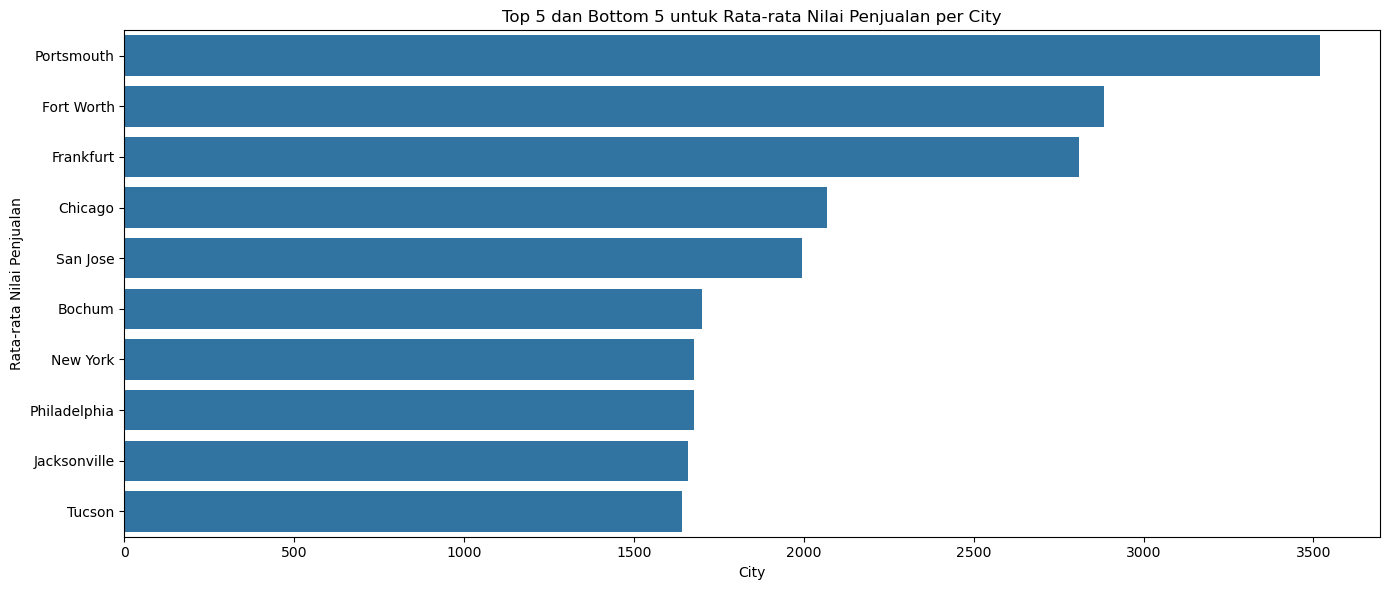

In [26]:
# Membuat visual
fig, ax1 = plt.subplots(figsize=(14, 6))
sns.barplot(data=demographic_city_combined, y='City', x='Rata_rata_Nilai_Penjualan', ax=ax1)

# Labeling
ax1.set_title('Top 5 dan Bottom 5 untuk Rata-rata Nilai Penjualan per City')
ax1.set_xlabel('City')
ax1.set_ylabel('Rata-rata Nilai Penjualan')

# Menyimpan visual pada streamlit
plt.tight_layout()
st.pyplot(plt)

# Memperlihatkan visual
plt.show()

Berdasarkan gambar di atas,
* Kota dengan rata-rata Penjualan tertinggi adalah Kota Portsmouth.
* Kebanyakan kota memiliki rata-rata penjualan di bawah $2000.

### **2. Analisa Demographic Age_Class**

In [27]:
# Membuat dataframe baru
demographic_age_class = df_9.groupby('Age_Class').agg(
    Rata_rata_Nilai_Penjualan=('Total_Amount_Sum', 'mean')
).reset_index()

C:\Users\mnuzu\AppData\Local\Temp\ipykernel_11440\1200935958.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographic_age_class = df_9.groupby('Age_Class').agg(


C:\Users\mnuzu\AppData\Local\Temp\ipykernel_11440\849048405.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=demographic_age_class, x='Age_Class', y='Rata_rata_Nilai_Penjualan', ax=ax1, palette=colors)
2024-12-19 13:27:08.561 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 13:27:08.909 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 13:27:08.914 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


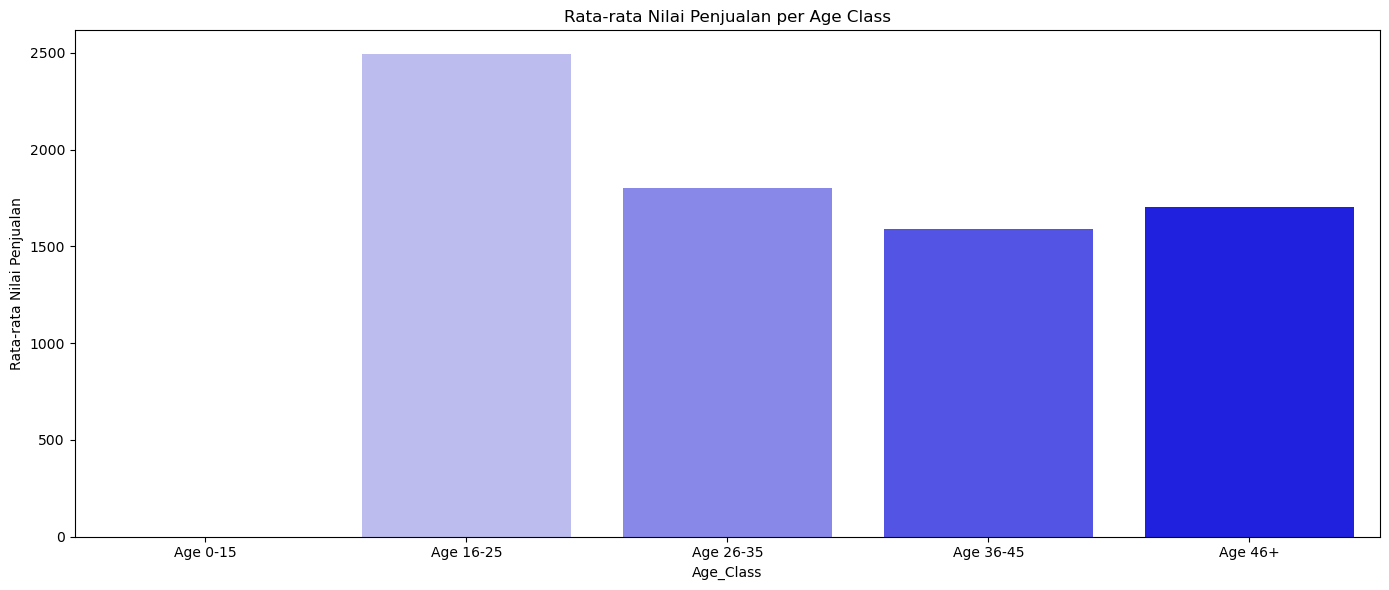

In [28]:
# Membuat Visual
fig, ax1 = plt.subplots(figsize=(14, 6))
# Mengatur warna
colors = sns.light_palette("blue", as_cmap=False, n_colors=len(demographic_age_class))
sns.barplot(data=demographic_age_class, x='Age_Class', y='Rata_rata_Nilai_Penjualan', ax=ax1, palette=colors)

# Labeling
ax1.set_title('Rata-rata Nilai Penjualan per Age Class')
ax1.set_xlabel('Age_Class')
ax1.set_ylabel('Rata-rata Nilai Penjualan')

# Menyimpan visual pada streamlit
plt.tight_layout()
st.pyplot(plt)

# Memperlihatkan visual
plt.show()

Berdasarkan gambar di atas,
* Kelompok umur tertinggi adalah Age 16-25
* Tidak ada pembeli yang berumur 15 tahun dan ke bawah.
* Hubungan umur dan rata-rata penjualan tidak linear dimana kelompok umur tertinggi adalah Age 16-25, dan disusul oleh Age 46+.

### **3. Analisa Demographic Gender**

In [29]:
# Membuat dataframe baru
demographic_gender = df_9.groupby('Gender').agg(
    Rata_rata_Nilai_Penjualan=('Total_Amount_Sum', 'mean')
).reset_index()

2024-12-19 13:27:09.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 13:27:09.217 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 13:27:09.217 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


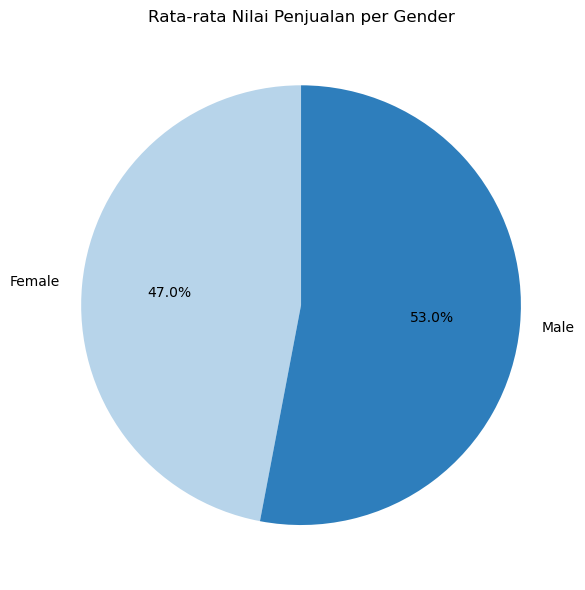

In [30]:
# Membuat visual
plt.figure(figsize=(8, 6))
plt.pie(
    demographic_gender['Rata_rata_Nilai_Penjualan'],
    labels=demographic_gender['Gender'],
    autopct='%1.1f%%',
    colors=plt.cm.Blues(np.linspace(0.3, 0.7, len(demographic_gender))),
    startangle=90
)

# Labeling
plt.title('Rata-rata Nilai Penjualan per Gender')

# Menyimpan visual pada streamlit
plt.tight_layout()
st.pyplot(plt)

# Memperlihatkan visual
plt.show()

Berdasarkan gambar di atas,
* Male merupakan Gender dengan rata-rata penjualan yang tertinggi
* Rata-rata penjualan male dan female hampir sama.

### **4. Analisa Demographic Income**

In [31]:
# Membuat dataframe baru
demographic_income = df_9.groupby('Income').agg(
    Rata_rata_Nilai_Penjualan=('Total_Amount_Sum', 'mean')
).reset_index()
demographic_income = demographic_income.loc[[1, 2, 0]].reset_index(drop=True)

C:\Users\mnuzu\AppData\Local\Temp\ipykernel_11440\3484880171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=demographic_income, x='Income', y='Rata_rata_Nilai_Penjualan', ax=ax1, palette=colors)
2024-12-19 13:27:09.459 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 13:27:09.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 13:27:09.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


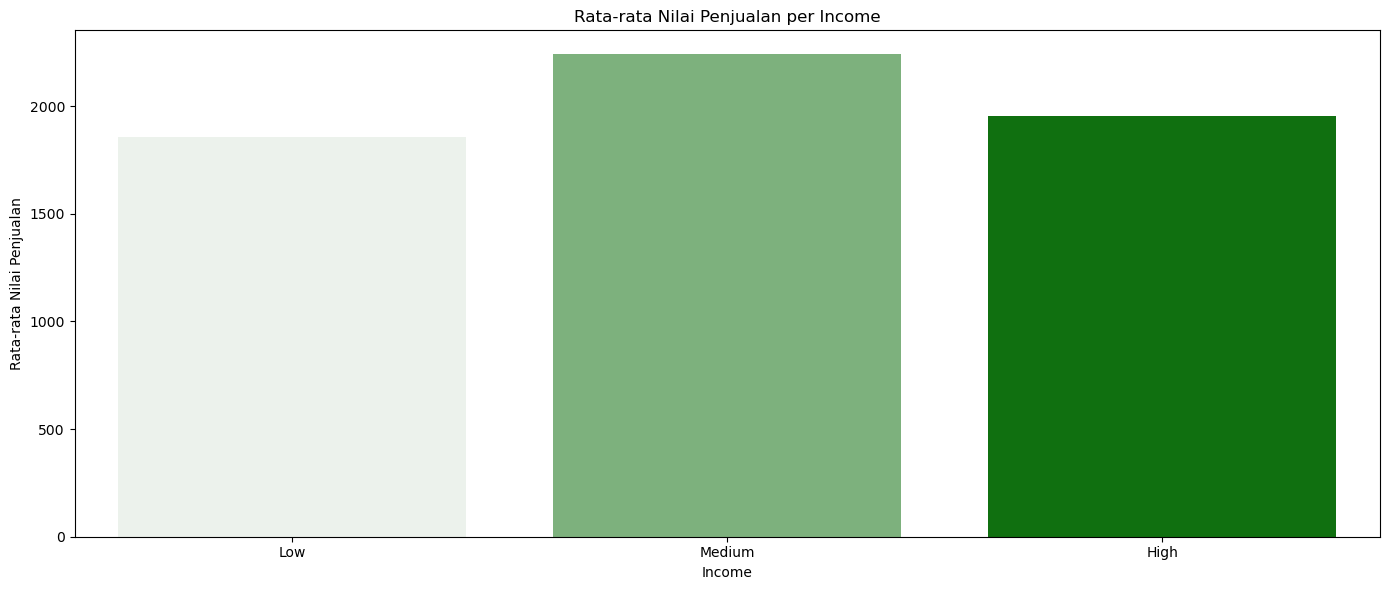

In [32]:
# Membuat visual
fig, ax1 = plt.subplots(figsize=(14, 6))
# mengatur warna
colors = sns.light_palette("green", as_cmap=False, n_colors=len(demographic_income))
sns.barplot(data=demographic_income, x='Income', y='Rata_rata_Nilai_Penjualan', ax=ax1, palette=colors)

# Labeling
ax1.set_title('Rata-rata Nilai Penjualan per Income')
ax1.set_xlabel('Income')
ax1.set_ylabel('Rata-rata Nilai Penjualan')

# Menyimpan visual pada streamlit
plt.tight_layout()
st.pyplot(plt)

# Memperlihatkan visual
plt.show()


Berdasarkan gambar di atas,
* Medium Income merupakan jenis Income dengan rata-rata penjualan yang tertinggi
* Hampir sama dengan Gender, Income Low, Medium, dan High memiliki rata-rata penjualan yang hampir sama.

### **5. Analisa Demographic Customer_Segment**

In [33]:
# Membuat dataframe baru
demographic_Customer_Segment = df_9.groupby('Customer_Segment').agg(
    Rata_rata_Nilai_Penjualan=('Total_Amount_Sum', 'mean')
).reset_index()

C:\Users\mnuzu\AppData\Local\Temp\ipykernel_11440\362784496.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=demographic_Customer_Segment, x='Customer_Segment', y='Rata_rata_Nilai_Penjualan', ax=ax1, palette=colors)
2024-12-19 13:27:09.994 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 13:27:10.320 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 13:27:10.321 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


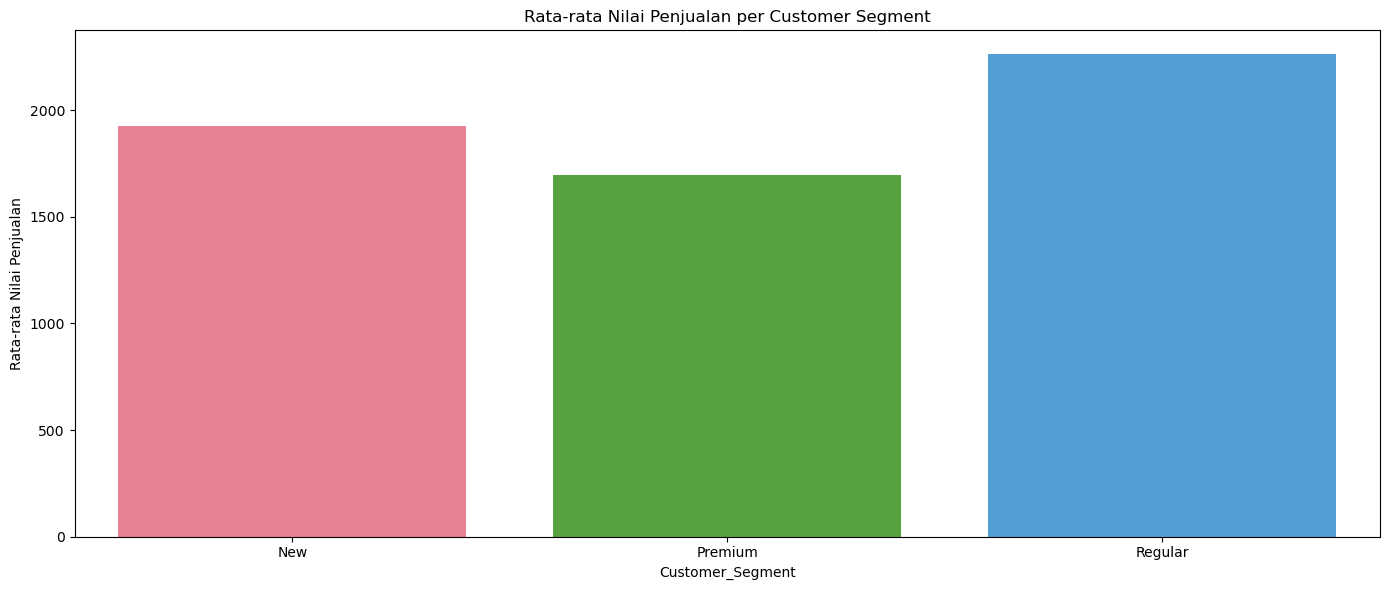

In [34]:
# Membuat visual
fig, ax1 = plt.subplots(figsize=(14, 6))
colors = sns.color_palette("husl", len(demographic_Customer_Segment))
sns.barplot(data=demographic_Customer_Segment, x='Customer_Segment', y='Rata_rata_Nilai_Penjualan', ax=ax1, palette=colors)

# Labeling
ax1.set_title('Rata-rata Nilai Penjualan per Customer Segment')
ax1.set_xlabel('Customer_Segment')
ax1.set_ylabel('Rata-rata Nilai Penjualan')

# Menyimpan visual pada streamlit
plt.tight_layout()
st.pyplot(plt)

# Memperlihatkan visual
plt.show()

Berdasarkan gambar di atas,
* Customer yang bersifat regular adalah customer dengan rata-rata penjualan tertinggi.
* Hampir sama dengan Gender, New, Regular dan Premium Customer memiliki rata-rata penjualan yang hampir sama.

## **E. Hasil**

Hasil Dashboard Tableau:
https://public.tableau.com/app/profile/muhammad.nuzul.mahfiruddin/viz/Book2_17273601233140/Dashboard1?publish=yes

In [35]:
# Mencari karakteristik dari masing-masing atribut (City, Age_Class, Gender, Income, dan Customer Segment) dengan nilai Rata_rata_Nilai_Penjualan tertinggi
maxcity = demographic_city[demographic_city['Rata_rata_Nilai_Penjualan'] == demographic_city['Rata_rata_Nilai_Penjualan'].max()]['City'].max()
maxagelass = demographic_age_class[demographic_age_class['Rata_rata_Nilai_Penjualan'] == demographic_age_class['Rata_rata_Nilai_Penjualan'].max()]['Age_Class'].max()
maxgender = demographic_gender[demographic_gender['Rata_rata_Nilai_Penjualan'] == demographic_gender['Rata_rata_Nilai_Penjualan'].max()]['Gender'].max()
maxincome = demographic_income[demographic_income['Rata_rata_Nilai_Penjualan'] == demographic_income['Rata_rata_Nilai_Penjualan'].max()]['Income'].max()
maxsegment = demographic_Customer_Segment[demographic_Customer_Segment['Rata_rata_Nilai_Penjualan'] == demographic_Customer_Segment['Rata_rata_Nilai_Penjualan'].max()]['Customer_Segment'].max()

print('Atribut City dengan Rata_rata_Nilai_Penjualan tertinggi adalah', maxcity)
print('Atribut Age Class dengan Rata_rata_Nilai_Penjualan tertinggi adalah', maxagelass)
print('Atribut Gender dengan Rata_rata_Nilai_Penjualan tertinggi adalah', maxgender)
print('Atribut Income dengan Rata_rata_Nilai_Penjualan tertinggi adalah', maxincome)
print('Atribut Customer Segment dengan Rata_rata_Nilai_Penjualan tertinggi adalah', maxsegment)

Atribut City dengan Rata_rata_Nilai_Penjualan tertinggi adalah Portsmouth
Atribut Age Class dengan Rata_rata_Nilai_Penjualan tertinggi adalah Age 16-25
Atribut Gender dengan Rata_rata_Nilai_Penjualan tertinggi adalah Male
Atribut Income dengan Rata_rata_Nilai_Penjualan tertinggi adalah Medium
Atribut Customer Segment dengan Rata_rata_Nilai_Penjualan tertinggi adalah Regular


Berdasarkan analisis demografi dapat ditarik informasi bahwa:
* Kota dengan Rata_rata_Nilai_Penjualan tertinggi adalah Portsmouth
* Kelas umur dengan Rata_rata_Nilai_Penjualan tertinggi adalah Age 16-25
* Gender dengan Rata_rata_Nilai_Penjualan tertinggi adalah Male
* Kelompok Income dengan Rata_rata_Nilai_Penjualan tertinggi adalah Medium
* Kelompok pelanggan dengan Rata_rata_Nilai_Penjualan tertinggi adalah Regular

Hasil dari Analisa Demographic ini bisa dikunjungi dari laman https://public.tableau.com/app/profile/muhammad.nuzul.mahfiruddin/viz/Book2_17273601233140/Dashboard1?publish=yes

## **F. Rekomendasi**

Berikut merupakan rekomendasi tentang keputusan bisnis yang dapat dijalankan berdasarkan anslis demografi:

* **Fokus pada Portsmouth**: Karena Portsmouth memiliki Nilai Penjualan Rata-Rata tertinggi, prioritaskan kampanye pemasaran berdasarkan budaya di kota ini. 

* **Libatkan Kelompok Usia 16-25 Tahun**: Kelompok usia ini menunjukkan potensi pembelanjaan tertinggi. Sesuaikan produk, promosi, dan iklan agar selaras dengan preferensi dan tren yang populer di kalangan demografi ini.

* **Target Pelanggan Pria**: Kembangkan kampanye yang secara khusus memenuhi preferensi pelanggan pria, seperti mempromosikan produk atau layanan yang sesuai dengan kebiasaan belanja mereka.

* **Memanfaatkan Kelompok Berpenghasilan Menengah**: Dengan pelanggan Berpenghasilan Menengah yang menunjukkan Nilai Penjualan Rata-Rata tertinggi, fokuslah pada penawaran bernilai baik yang menarik bagi kelompok ini. Soroti kualitas dan keterjangkauan melalui kampanye dan tekankan produk kelas menengah dalam iklan.

* **Perkuat Hubungan dengan Pelanggan Reguler**: Pelanggan tetap memberikan pendapatan yang konsisten. Tingkatkan loyalitas mereka dengan menerapkan program hadiah, menawarkan diskon eksklusif, dan memberikan rekomendasi yang dipersonalisasi untuk mendorong keterlibatan berkelanjutan dan nilai seumur hidup yang lebih tinggi.